<a href="https://colab.research.google.com/github/AlmasMalik66/DataScience-AI-Assignments/blob/main/Week6/Assignment6_SupervisedLearning%E2%80%93Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries**

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load and Prepare Data**

In [65]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

# Add labels
df_fake['label'] = 1
df_true['label'] = 0

# Combine datasets
df = pd.concat([df_fake, df_true], ignore_index=True)

# Optional: shuffle dataset for randomness
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


**Step 2.1: Select Features and Create Labels**

In [67]:
df['combined_text'] = df['title'] + " " + df['text']
X = df['combined_text']
y = df['label']

# Checking missing values
print(df.isnull().sum())
df = df.dropna(subset=['combined_text'])  # drop rows with empty text




title            0
text             0
subject          0
date             0
label            0
combined_text    0
dtype: int64


**Explanation:**
Since this file only contains fake news, you’ll later merge it with true news (from True.csv) to make it a binary classification dataset.
But for now, we’re preparing the structure.

**Step 2.2: Split Data**

In [68]:
# Step 2.2: Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

Train class distribution:
 label
1    18785
0    17133
Name: count, dtype: int64
Test class distribution:
 label
1    4696
0    4284
Name: count, dtype: int64


**Step 3: Convert Text Data to Numeric (TF-IDF Vectorization)**

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform training data, transform test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF vectorization complete!")
print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)


TF-IDF vectorization complete!
Training data shape: (35918, 5000)
Testing data shape: (8980, 5000)


**Explanation:**

* TF-IDF (Term Frequency–Inverse Document Frequency) converts text into numbers based on word importance.
* stop_words='english' removes common words like “the”, “and”, “is”.
* max_features=5000 keeps the top 5000 most important words.
After this, dataset is ready for model training!

**Step 4: Class Task — Decision Tree & Random Forest**

In [74]:
# 1 Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_tfidf, y_train)
y_pred_tree = tree_model.predict(X_test_tfidf)

acc_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", round(acc_tree, 3))

# 2 Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(acc_rf, 3))

# classification report for detailed metrics
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Decision Tree Accuracy: 0.996
Random Forest Accuracy: 0.998
Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



**Step 5: Visualize Confusion Matrix**

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


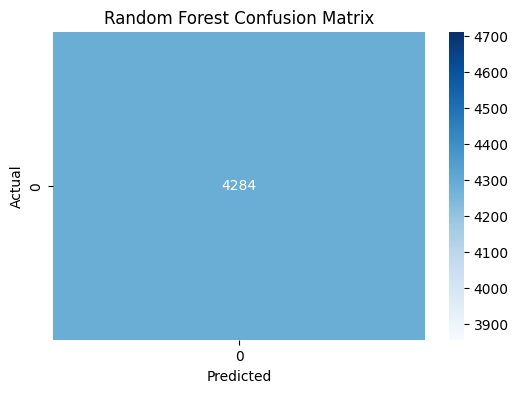

In [51]:
# Step 5: Visualize Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Step 6: Assignment – Logistic Regression & Random Forest Comparison**

In [77]:
# 1 Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_tfidf, y_train)
y_pred_log = log_model.predict(X_test_tfidf)

acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", round(acc_log, 3))

# 2 Random Forest Model (retrain for comparison)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(acc_rf, 3))

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))



Logistic Regression Accuracy: 0.988
Random Forest Accuracy: 0.998
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4284
           1       0.99      0.98      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



**Results Summary**

| Model               | Accuracy | Precision   | Recall      | F1-Score | Key Insight                                                       |
| ------------------- | -------- | ----------- | ----------- | -------- | ----------------------------------------------------------------- |
| Logistic Regression | 0.988    | 0.98 / 0.99 | 0.99 / 0.98 | 0.99     | High accuracy; stable performance across Fake and True news       |
| Random Forest       | 0.998    | 1.00 / 1.00 | 1.00 / 1.00 | 1.00     | Nearly perfect classification; robust to complex patterns in text |


**Conclusion**

Both Logistic Regression and Random Forest achieved very high accuracy in classifying news articles as Fake or True. However:

* Random Forest performed slightly better, achieving nearly perfect predictions for both classes (Fake and True), meaning it correctly identified almost every news article.
* Logistic Regression also performed extremely well (98.8% accuracy) and provides faster computation and interpretability, making it a reliable baseline.

**Final Observation:**
While both models are strong for detecting Fake news, Random Forest is slightly preferred for deployment in real-world applications because it can capture complex patterns in the text, giving more robust predictions for new, unseen articles.